## Part 2.1: Prediction of the Water Quality Index using Supervised Learning Regression algorithms

#### Objective

The objective is to try to predict the Water Quality Index using the fewest possible parameters and the easiest to use and obtain. We have used the 9 cation / ion measurements to calculate the WQI, therefore the idea is to use far fewer parameters to predict it.

#### Imports

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)
# Set default font size
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
# scaling values
from sklearn.preprocessing import MinMaxScaler
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#warnings
import warnings
warnings.filterwarnings("ignore")

#### Upload the file

Use file created on notebook 00_Cleaning_manipulation_and_unification.ipynb:

In [2]:
chemical_stations=pd.read_excel("chemical_WQI_ICI_stations.xlsx")
chemical_stations.head()

,POINT ID,DATE,River/Lake/Dam,Locality Description of Sample Station,Latitude (degrees),Longitude (degrees),Number Samples,Subdrainage Region,Drainage Region,YEAR,EC (μS/cm),PH,TDS (mg/L),Na (mg/L),Mg (mg/L),Ca (mg/L),F (mg/L),Cl (mg/L),NO2+NO3 (mg/L),SO4 (mg/L),PO4 (mg/L),TAL (CaCO3) (mg/L),Si (mg/L),K (mg/L),NH4 (mg/L),[Na] (mmol/L),[Mg] (mmol/L),[Ca] (mmol/L),[F] (mmol/L),[Cl] (mmol/L),[NO3] (mmol/L),[SO4] (mmol/L),[PO4] (mmol/L),[Si] (mmol/L),[K] (mmol/L),[NH4] (mmol/L),[TAL] (mmol/L),[HCO3] (mmol/L),[CO3] (mmol/L),2[SO4],[Cl],SAR,HCO3 (mg/L),WQI,Class WQI,ICI (%),Class ICI,Class SAR
0,90160,1976-04-20,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,366.0,7.83,267.0,24.1,18.2,22.0,0.57,19.7,0.04,19.6,0.014,130.7,4.33,3.47,0.01,1.047826,0.748971,0.548628,0.030000,0.554930,0.000645,0.203954,0.000147,0.154093,0.088747,0.000556,1.307,2.596404,0.008798,11.404165,15.514532,0.919854,158.380632,33.716337,Excellent,27.074050,Rock dominance,Very good water quality
1,90160,1976-04-27,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,380.0,7.78,280.0,25.6,19.2,22.8,0.57,19.0,0.04,20.4,0.004,138.3,4.06,3.54,0.02,1.113043,0.790123,0.568579,0.030000,0.535211,0.000645,0.212279,0.000042,0.144484,0.090537,0.001111,1.383,2.749393,0.008303,11.395173,14.365124,0.954883,167.712993,34.836136,Excellent,25.891041,Rock dominance,Very good water quality
2,90160,1976-05-18,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,372.0,7.48,269.0,22.8,17.2,23.9,0.44,18.8,0.29,17.9,0.007,134.3,5.59,2.91,0.08,0.991304,0.707819,0.596010,0.023158,0.529577,0.004677,0.186264,0.000074,0.198932,0.074425,0.004444,1.343,2.677893,0.004053,10.382320,14.759249,0.868154,163.351497,31.462083,Excellent,25.300708,Rock dominance,Very good water quality
3,90160,1976-05-25,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,367.0,7.43,269.0,22.9,17.9,23.8,0.48,19.4,0.39,18.1,0.004,132.7,5.46,3.03,0.08,0.995652,0.736626,0.593516,0.025263,0.546479,0.006290,0.188345,0.000042,0.194306,0.077494,0.004444,1.327,2.646859,0.003571,10.530419,15.276851,0.863294,161.458381,32.372463,Excellent,25.991911,Rock dominance,Very good water quality
4,90160,1976-06-01,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,383.0,7.34,279.0,24.3,18.5,24.5,0.53,19.9,0.56,18.1,0.007,137.6,5.13,3.03,0.10,1.056522,0.761317,0.610973,0.027895,0.560563,0.009032,0.188345,0.000074,0.182562,0.077494,0.005556,1.376,2.745978,0.003011,10.210491,15.194491,0.901894,167.504656,34.027075,Excellent,25.633347,Rock dominance,Very good water quality


### Possible Predictive Variables
To calculate the WQI we have used a series of parameters from our dataset that obviously we cannot use for prediction. Therefore, we have a series of numerical and categorical variables that we can use and which are:
#### Numerical variables
- Electrical conductivity (EC (μS / cm))
- PH
- Sulfate (SO4 (mg / L))
- Phosphate (PO4 (mg / L))
- CaCO3 (mg / L)
- Silicon (Si (mg / L))
- NH4 (mg / L)
- Latitude (degrees)
- Longitude (degrees)

#### Categorical variables
- Drainage Region
- Subdrainage Region
- POINT ID
- Class ICI

## Treatment of  variables

We have different variables that represent the positions of the measurement points of rivers, lakes and reservoirs. The location of the measurement points may have an influence on the WQI, but it does not make sense to use more than one variable to represent the positions, since they would provide redundant information.

Let's see the density graphs colored by the value of the variable in question. They can be considered as smoothed histograms, as they show the distribution of a single variable. If we color the density curves by a variable, this will show us how the distribution changes as a function of position.

In order not to saturate the graphs, we will limit the graph to sample types that have more than "x" measures:

### 1) Position variables

#### Variable: Region (Categorical variable)

In [3]:
print("There are",len(chemical_stations["Drainage Region"].unique()), "different regions")
chemical_stations["Drainage Region"].unique()

There are 21 different regions


array(['A', 'B', 'C', 'D', 'E', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X'], dtype=object)

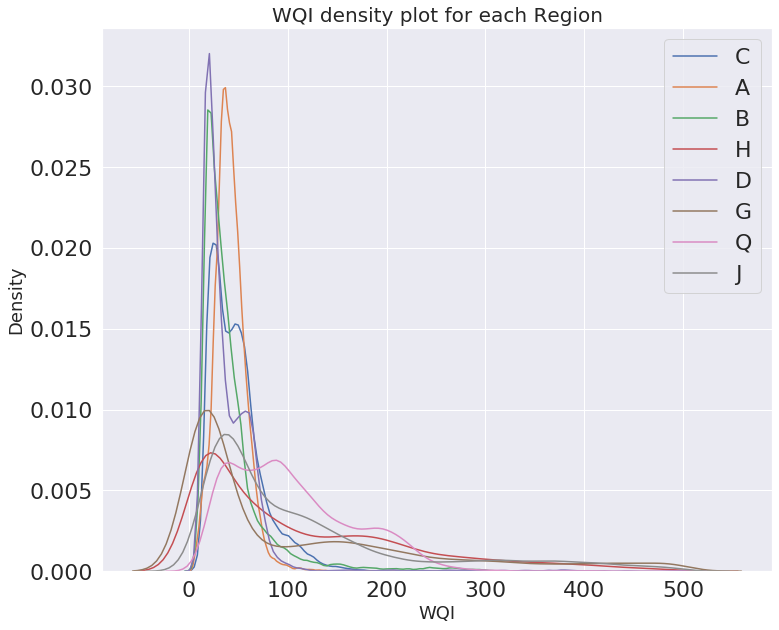

In [4]:
# Creation of a samples list with more than 4000 measurements
types =  chemical_stations.dropna(subset=['WQI'])
types = types['Drainage Region'].value_counts()
types = list(types[types.values > 4000].index)
# Plot of distribution
plt.subplots(figsize=(12, 10))
# Graph for each type
for b_type in types:
    # Selecting the type of WQI
    subset = chemical_stations[chemical_stations['Drainage Region'] == b_type]
     # Densitiy plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 1);
    # Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('WQI density plot for each Region', size = 20);

We can see that the Region has an effect on the WQI although perhaps not as much as expected. I am going to include this categorical variable as a variable to predict the WQI because it may provide information when it comes to predicting the WQI.

#### Variable: Subregion (Categorical variable)

In [5]:
print("There are",len(chemical_stations["Subdrainage Region"].unique()), "different subregions")
chemical_stations["Subdrainage Region"].unique()

There are 173 different subregions


array(['A23', 'A21', 'A24', 'A22', 'A30', 'A40', 'A50', 'A60', 'A70',
       'A80', 'A90', 'B10', 'B11', 'B20', 'B32', 'B31', 'B40', 'B50',
       'B60', 'B70', 'B80', 'B90', 'C11', 'C13', 'C12', 'C23', 'C22',
       'C21', 'C24', 'C25', 'C30', 'C40', 'C42', 'C52', 'C51', 'C60',
       'C70', 'C80', 'C90', 'D14', 'D15', 'D12', 'D13', 'D11', 'D20',
       'D34', 'D33', 'D32', 'D35', 'D31', 'D41', 'D55', 'D53', 'D72',
       'D73', 'D80', 'E10', 'E20', 'E40', 'G10', 'G20', 'G30', 'G40',
       'G50', 'H10', 'H20', 'H30', 'H40', 'H50', 'H60', 'H70', 'H80',
       'H90', 'J12', 'J11', 'J13', 'J25', 'J21', 'J22', 'J23', 'J33',
       'J35', 'J34', 'J40', 'K10', 'K20', 'K30', 'K40', 'K50', 'K60',
       'K70', 'K80', 'K90', 'L30', 'L60', 'L70', 'L82', 'L90', 'M10',
       'M20', 'N12', 'N24', 'N22', 'N23', 'N30', 'N40', 'P10', 'P30',
       'P40', 'Q13', 'Q12', 'Q14', 'Q21', 'Q30', 'Q43', 'Q44', 'Q41',
       'Q50', 'Q60', 'Q70', 'Q80', 'Q92', 'Q91', 'Q93', 'Q94', 'R10',
       'R20', 'R30',

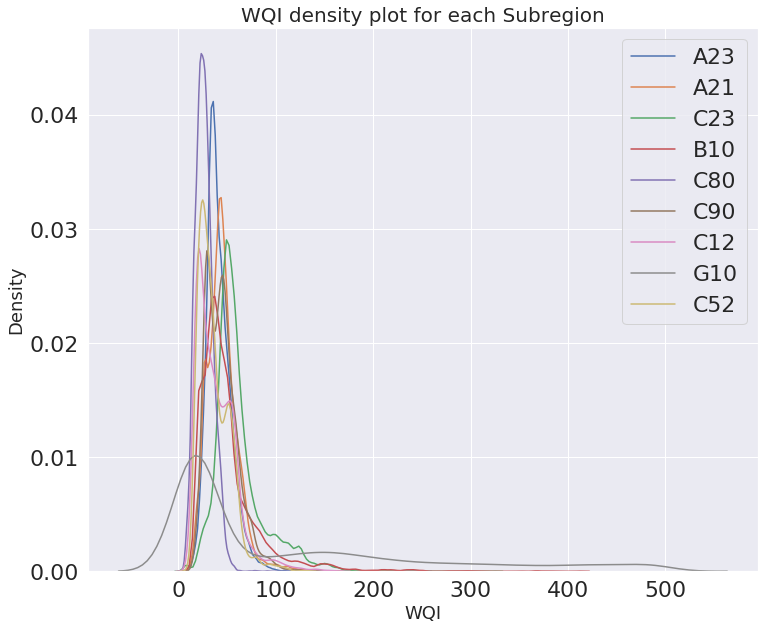

In [11]:
# Creation of a samples list with more than 5000 measurements
types =  chemical_stations.dropna(subset=['WQI'])
types = types['Subdrainage Region'].value_counts()
types = list(types[types.values > 5000].index)
# Plot of distribution
plt.subplots(figsize=(12, 10))
# Graph for each type
for b_type in types:
    # Selecting the type of WQI
    subset = chemical_stations[chemical_stations['Subdrainage Region'] == b_type]
     # Densitiy plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 1);
    # Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('WQI density plot for each Subregion', size = 20);

In this case, the subregion does not seem to affect the WQI much. It would also provide information that is very similar to the variable "Region" and including both would not make sense. On the other hand, there are 173 subregions, which would mean putting many predictive variables in the models apparently unnecessarily.

####  Variable: POINT ID (Categorical variable)

In [8]:
chemical_stations["POINT ID"].dtype

dtype('int64')

In [9]:
# Change the POINT ID to object:
chemical_stations["POINT ID"]=chemical_stations["POINT ID"].astype("object")

In [10]:
print("There are",len(chemical_stations["POINT ID"].unique()), "different measuring points")
chemical_stations["POINT ID"].unique()

There are 1045 different measuring points


array([90160, 90164, 90165, ..., 177887, 177888, 178756], dtype=object)

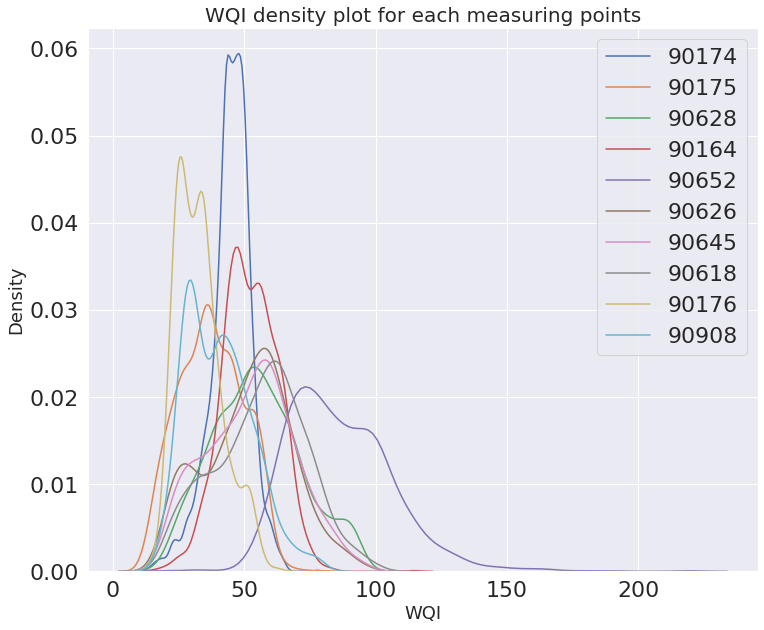

In [12]:
# Creation of a samples list with more than 1300 measurements
types =  chemical_stations.dropna(subset=['WQI'])
types = types['POINT ID'].value_counts()
types = list(types[types.values > 1300].index)
# Plot of distribution
plt.subplots(figsize=(12, 10))
# Graph for each type
for b_type in types:
    # Selecting the type of WQI
    subset = chemical_stations[chemical_stations['POINT ID'] == b_type]
     # Densitiy plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 1);
    # Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('WQI density plot for each measuring points', size = 20);

The measurement points do seem to contribute information to the prediction of the WQI. However, using this categorical variable as a variable for the prediction of the WQI would mean having 1045 new variables and would greatly slow down the process.

#### Variable: Longitude/Latitude (Numerical variable)

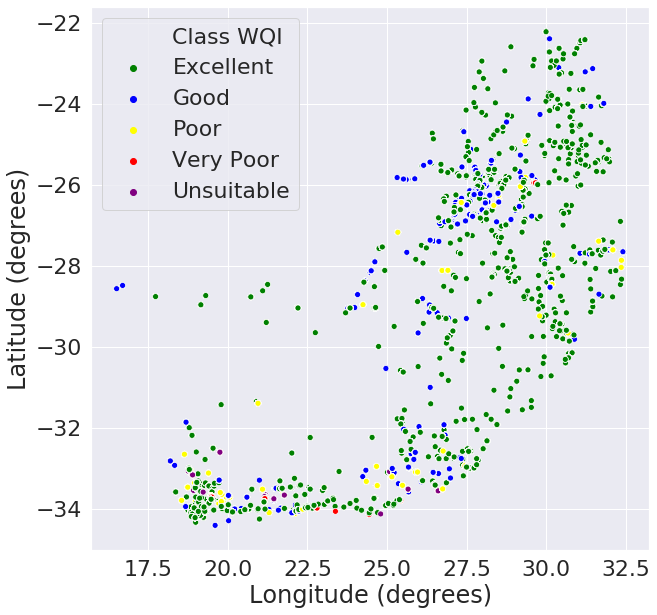

In [18]:
# See the map
plt.figure (figsize = (10,10)) 
sns.scatterplot (chemical_stations['Longitude (degrees)'], chemical_stations['Latitude (degrees)'], 
                 hue=chemical_stations["Class WQI"], palette=["green", "blue", "yellow", "red", "purple"])

At first glance it seems that latitude and longitude could have some effect on water quality, the further south and east it seems that the water quality is worse.

In [14]:
print("There are",len(chemical_stations["Latitude (degrees)"].unique()), "different latitudes")
print("There are",len(chemical_stations["Longitude (degrees)"].unique()), "different longitudes")

There are 939 different latitudes
There are 947 different longitudes


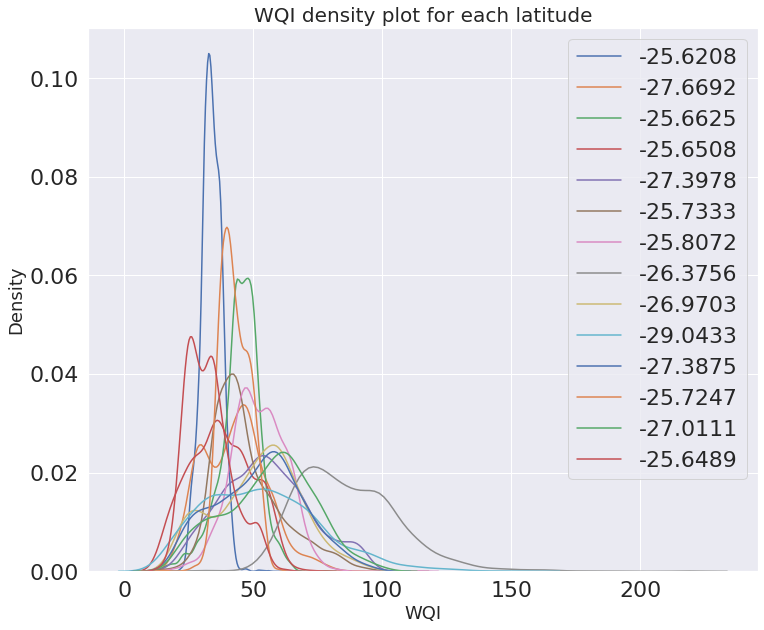

In [15]:
# Creation of a samples list with more than 1300 measurements
types =  chemical_stations.dropna(subset=['WQI'])
types = types['Latitude (degrees)'].value_counts()
types = list(types[types.values > 1300].index)
# Plot of distribution
plt.subplots(figsize=(12, 10))
# Graph for each type
for b_type in types:
    # Selecting the type of WQI
    subset = chemical_stations[chemical_stations['Latitude (degrees)'] == b_type]
     # Densitiy plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 1);
    # Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('WQI density plot for each latitude', size = 20);

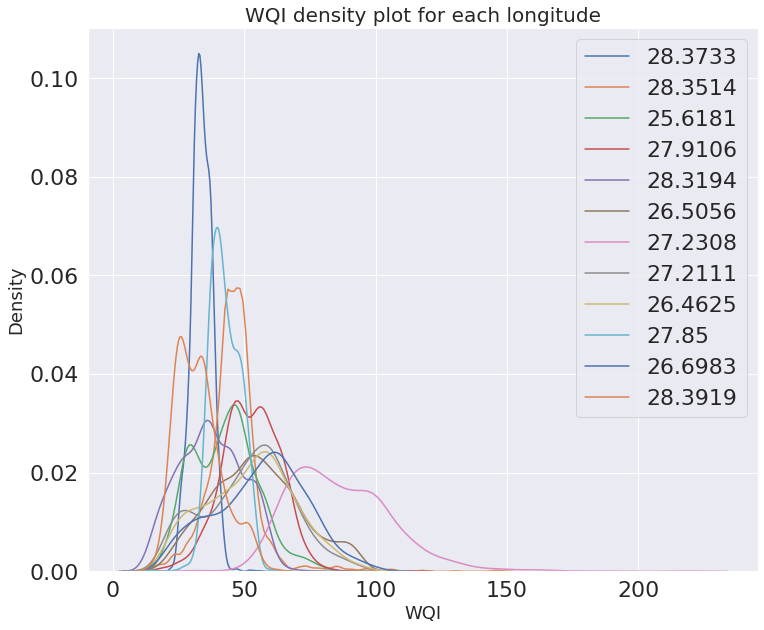

In [16]:
# Creation of a samples list with more than 1300 measurements
types =  chemical_stations.dropna(subset=['WQI'])
types = types['Longitude (degrees)'].value_counts()
types = list(types[types.values > 1300].index)
# Plot of distribution
plt.subplots(figsize=(12, 10))
# Graph for each type
for b_type in types:
    # Selecting the type of WQI
    subset = chemical_stations[chemical_stations['Longitude (degrees)'] == b_type]
     # Densitiy plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 1);
    # Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('WQI density plot for each longitude', size = 20);

Perhaps it was obvious, but I think it makes sense to use as variables that represent the position of the measurement points, the longitude and latitude variables as the prediction variable of the WQI because from the graphs it can be seen that they have an influence on the WQI and Being a numerical variable, it will not slow down the process as much as if we used a categorical variable that would introduce many more variables into the model (there are 1045 measurement points, 173 subregions and 21 different regions).

### 2) Inorganic Chemistry Index Classes (Categorical variable)

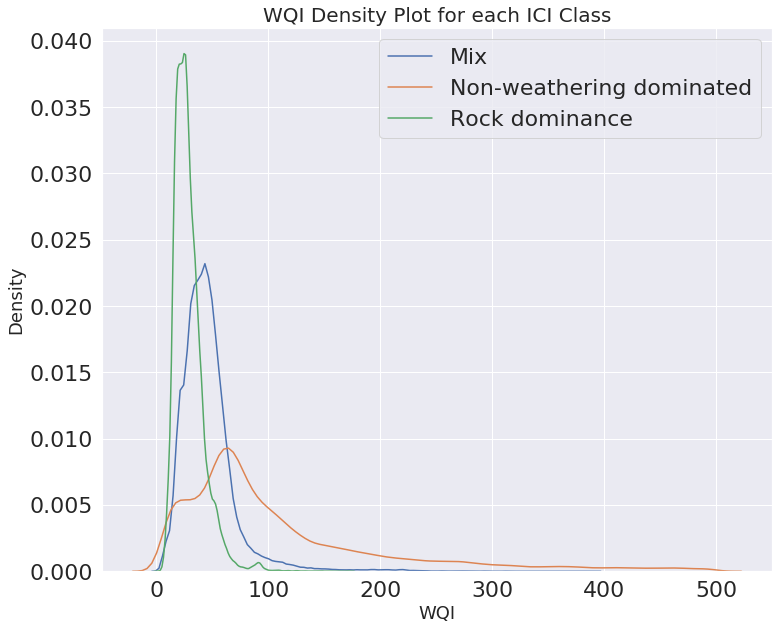

In [17]:
types =  chemical_stations.dropna(subset=['WQI'])
types = types['Class ICI'].value_counts()
types = list(types[types.values > 1300].index)
# Plot of distribution
plt.subplots(figsize=(12, 10))
# Graph for each type
for b_type in types:
    # Selecting the type of WQI
    subset = chemical_stations[chemical_stations['Class ICI'] == b_type]
     # Densitiy plot of WQI
    sns.kdeplot(subset['WQI'].dropna(),
               label = b_type, shade = False, alpha = 1);
    # Label the plot
plt.xlabel('WQI', size = 18); plt.ylabel('Density', size = 18); 
plt.title('WQI Density Plot for each ICI Class', size = 20);

This variable could contribute information to the prediction of the WQI, but what is necessary to have this variable? Precisely you need to measure chlorine, sulfate, nitrites, phosphates and bicarbonates (Characterisation of the inorganic chemistry of surface waters in SA.pdf). It does not make sense if what I am looking for is to predict the value of the WQI with the fewest possible parameters and the easiest to measure.